In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#### The DataSet is taken from the Kaggle available at https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset?select=FINAL_USO.csv


In [2]:
df = pd.read_csv("FINAL_USO.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [4]:
df.shape

(1718, 81)

In [5]:
#checking the null values
df.isnull().values.any()

False

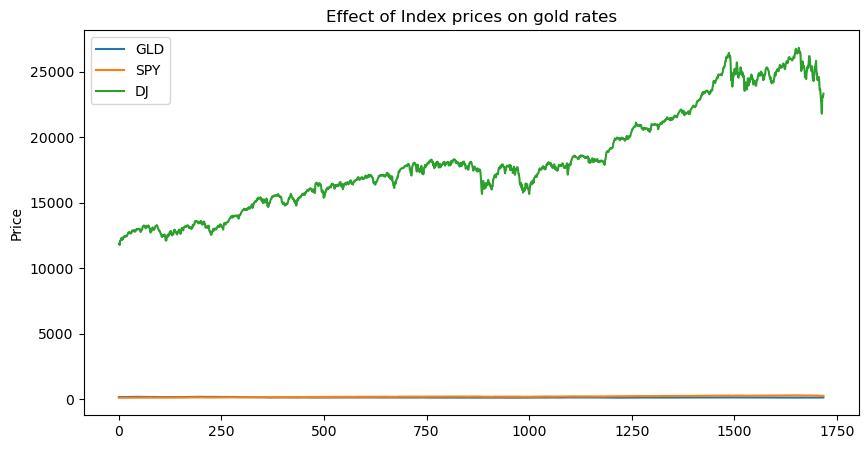

In [6]:
dfp = pd.DataFrame({'GLD':df['Adj Close'], 'SPY':df['SP_Ajclose'], 'DJ':df['DJ_Ajclose']})
df_ax = dfp.plot(title='Effect of Index prices on gold rates',figsize=(10,5))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [7]:
X = df.drop(labels='Adj Close',axis=1)
y = df['Adj Close']

In [8]:
#Normalizing the DataSet
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X[X.columns[1:]])

In [9]:
df_final = pd.DataFrame(columns=X.columns[1:], data=normalized_data, index=X.index)
df_final.head()

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,0.744604,0.738369,0.708213,0.708932,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
1,0.738655,0.744116,0.738341,0.748598,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2,0.754842,0.750821,0.744669,0.743674,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
3,0.773381,0.772304,0.775210,0.772534,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
4,0.775595,0.773673,0.769019,0.774997,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738


In [10]:
#splitting the Data into Train - Test

## As the Dataset is time-series, so we will use the time-series split
from sklearn.model_selection import TimeSeriesSplit
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(df_final):
    X_train, X_test = df_final[:len(train_index)], df_final[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
X_train.head()

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,0.744604,0.738369,0.708213,0.708932,0.216899,0.005672,0.005128,0.011410,0.010907,0.005227,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
1,0.738655,0.744116,0.738341,0.748598,0.180089,0.000994,0.003671,0.007393,0.007502,0.006067,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2,0.754842,0.750821,0.744669,0.743674,0.119667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
3,0.773381,0.772304,0.775210,0.772534,0.082714,0.000702,0.010605,0.001979,0.021005,0.016988,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
4,0.775595,0.773673,0.769019,0.774997,0.113697,0.010934,0.011887,0.015834,0.022390,0.018108,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738


In [12]:
X_test.head()

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1562,0.296901,0.295840,0.299904,0.298044,0.037287,0.871660,0.876588,0.879497,0.876854,0.880032,...,0.221095,0.218222,0.233853,0.109688,0.193014,0.188211,0.197145,0.190896,0.190896,0.113788
1563,0.294826,0.293377,0.300041,0.299002,0.068034,0.876338,0.879326,0.879613,0.875527,0.878815,...,0.219292,0.216000,0.231504,0.073801,0.198934,0.192588,0.200119,0.191777,0.191777,0.147979
1564,0.292335,0.296388,0.299629,0.299685,0.057804,0.874466,0.872334,0.878449,0.871603,0.875214,...,0.217039,0.216000,0.231504,0.072432,0.195974,0.188795,0.199227,0.190015,0.190015,0.104577
1565,0.293857,0.294745,0.299078,0.300643,0.028440,0.882594,0.883697,0.887996,0.883375,0.886015,...,0.217715,0.219111,0.234792,0.085700,0.197158,0.193755,0.202200,0.197063,0.197063,0.113704
1566,0.301328,0.297619,0.304168,0.299685,0.033347,0.888148,0.885270,0.886075,0.878989,0.881991,...,0.218842,0.214667,0.230094,0.110211,0.202191,0.195798,0.204579,0.193833,0.193833,0.170656


### Applying the ML Models

We will apply multiple regressor models and then compare the results

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

model_names = []
model_values = []

def Validator(model, X_test, y_test):
    predicted = model.predict(X_test)
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    print('RMSE: ',RSME_score)

    R2_score = r2_score(y_test, predicted)
    print('R2 score: ',R2_score)
    
    return RSME_score

Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)
benchmark_dt=dt_model.fit(X_train, y_train)

In [38]:
Score = Validator(dt_model,X_test,y_test)
model_names.append('DecisionTree Reg')
model_values.append(Score)

RMSE:  0.05322921536468206
R2 score:  0.9997298893261987


Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, random_state=0)
benchmark_rf = rf_model.fit(X_train,y_train)

In [40]:
Score = Validator(rf_model,X_test,y_test)
model_names.append('RandomForest Reg')
model_values.append(Score)

RMSE:  0.02494534767560714
R2 score:  0.9999406773231064


Support Vector Regressor

In [41]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
benchmark_svr = svr_model.fit(X_train,y_train)

In [42]:
Score = Validator(svr_model,X_test,y_test)
model_names.append('SVR')
model_values.append(Score)

RMSE:  0.20513665423320024
R2 score:  0.9959883027267532


Lasso Regressor

In [43]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1, max_iter=10000)
bm_lasso = lasso_model.fit(X_train, y_train)

In [44]:
Score = Validator(lasso_model,X_test,y_test)
model_names.append('Lasso Reg')
model_values.append(Score)

RMSE:  0.25896946737502596
R2 score:  0.9936064988948549


Ridge Regressor

In [45]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
bm_ridge = ridge_model.fit(X_train, y_train)

In [46]:
Score = Validator(ridge_model,X_test,y_test)
model_names.append('Ridge Reg')
model_values.append(Score)

RMSE:  0.30088401959806665
R2 score:  0.9913694223938966


In [47]:
model_values,model_names

([0.05322921536468206,
  0.02494534767560714,
  0.20513665423320024,
  0.25896946737502596,
  0.30088401959806665],
 ['DecisionTree Reg', 'RandomForest Reg', 'SVR', 'Lasso Reg', 'Ridge Reg'])

### Plotting the Bar-Graph for Results

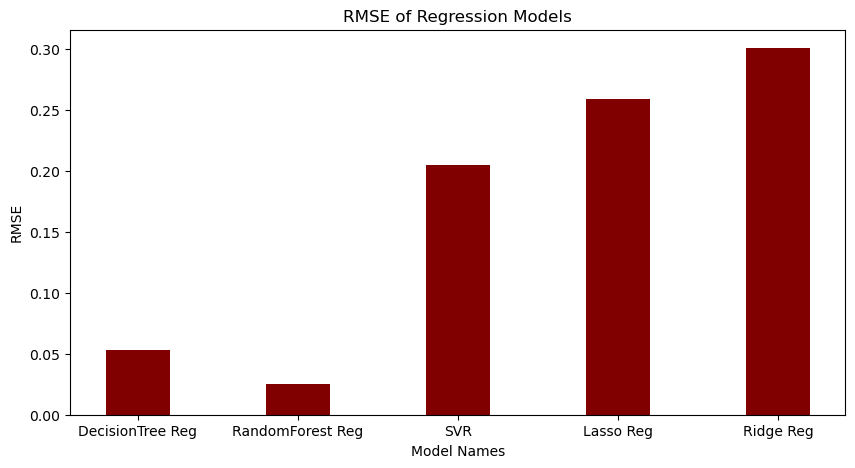

In [56]:
fig = plt.figure(figsize = (10, 5))
plt.bar(model_names, model_values, color ='maroon',
        width = 0.4)

plt.ylabel('RMSE')
plt.xlabel('Model Names')
plt.title('RMSE of Regression Models')
plt.show()

### Lowest is Better